In [2]:
import os 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [14]:
# 한글이 안되므로 한글 세팅해야 됨 
plt.rc('font', family = "gulim")
plt.rc('axes', unicode_minus = False)


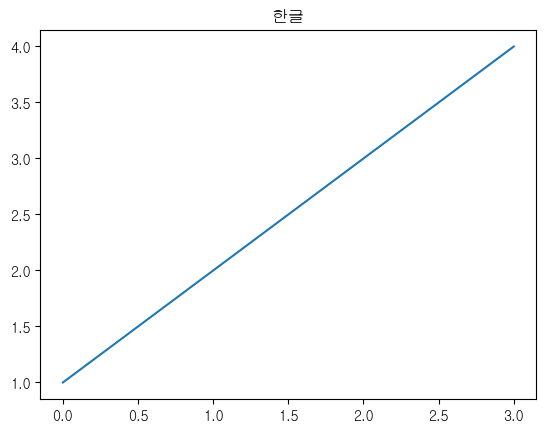

In [15]:
plt.plot([1,2,3,4])
plt.title("한글")
plt.show()

In [22]:
titanic = sns.load_dataset("titanic")
print("titanic = \n", titanic.head())
print("titanic_info = \n", titanic.info())

titanic = 
    survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived   

In [29]:
## missing value
print("missing value = ")
print(titanic.isnull().sum()) # 결측치 세기 

titanic_df = titanic.loc[:, :"fare"]
titanic_df.info()

titanic_df.dropna(axis = 0, inplace = True)
titanic_df.info()

missing value = 
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------

In [30]:
## 
titanic_df.head() 

,survived,pclass,sex,age,sibsp,parch,fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


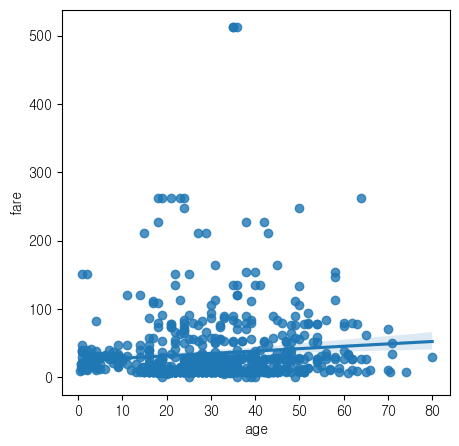

In [37]:
## sns.regplot :  regression plot 회귀 관계
fig, ax = plt.subplots(figsize = (5,5)) # 그래프 사이즈 바꾸기
sns.regplot(titanic_df, x ="age", y = "fare")
plt.show()
# fig.savefig("titanic_df") # png로 저장하기 

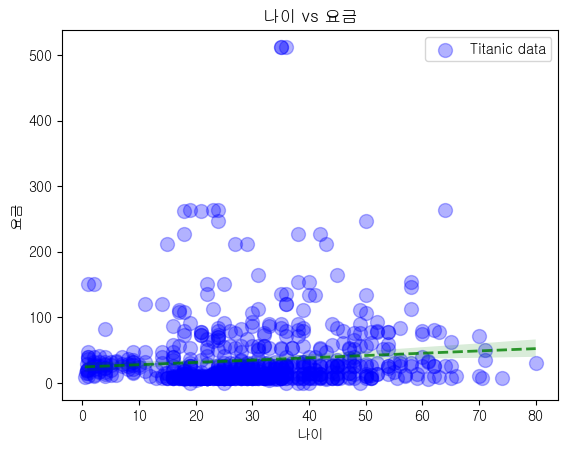

In [76]:
sns.regplot(titanic_df,
            x = "age", y = "fare",
            fit_reg=True,
            color = "g",
            marker = "o",  #"*"도 가능
            order = 1, # order는 다항함수의 차수를 이야기 한다. 
            # 1차나 2차나 모양이 비슷하다? = 둘 다 비슷한 통계량이다 
            label = "Titanic data",
            scatter_kws = {"fc": "b", "ec":"b", "s": 100, "alpha": 0.3},
            line_kws = {"lw":2,"alpha": 0.8, "ls" : "--", "alpha": 0.8}
            )
plt.title("나이 vs 요금")
plt.xlabel("나이")
plt.ylabel("요금")
plt.legend() # loc = 10 라벨의 위치 바꾸기 
plt.show()

In [106]:

## 실습 1 
# cut = ideal = > price vs carat(replot ) 
diamonds = sns.load_dataset("diamonds")
diamonds.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


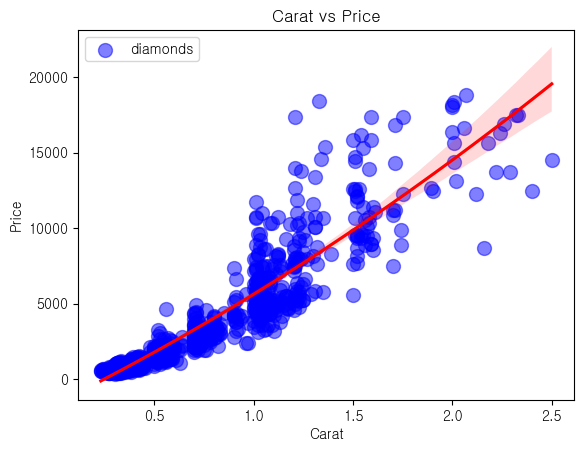

In [107]:
diamonds_df = diamonds[diamonds["cut"]== "Ideal"]

sns.regplot(diamonds_df.sample(n = 1000), # sample 써서 그릴 때마다 다르게 나와요 
            x = "carat", 
            y = "price",
            # fit_reg=True,
            color = "g",
            # marker = "o",  #"*"도 가능
            order = 2, # order는 다항함수의 차수를 이야기 한다. 
            # 1차나 2차나 모양이 비슷하다? = 둘 다 비슷한 통계량이다 
            label = "diamonds",
            scatter_kws = {"fc": "b", "ec":"b", "s": 100, "alpha": 0.5},
            line_kws = {'color' :"r"}
            )
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.legend() # loc = 10 라벨의 위치 바꾸기 
plt.show()

In [116]:
## sns.lmplot 

penguins = sns.load_dataset("penguins") 
print(penguins.head())
print(penguins["species"].value_counts())
print("\npenguins info : ",penguins.info())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     

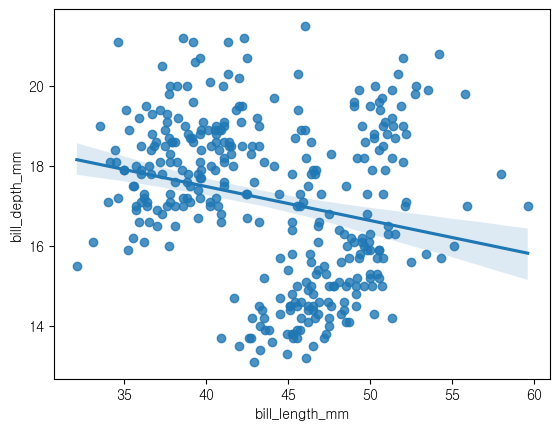

In [117]:
#  axis level 
sns.regplot(penguins, 
            x = "bill_length_mm",
            y = "bill_depth_mm", 
            )
plt.show()
# 부리의 길이가 길어질수록 부리의 깊이는 줄어든다 
# 간과한게 있음 : 펭귄의 종류 
# 두 변수의 상관관계를 나타날 때는 regplot 을 쓰는 것이 좋다. 

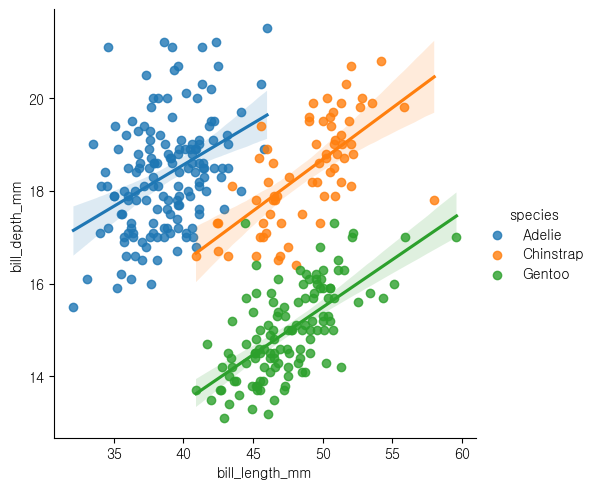

In [121]:
#  
sns.lmplot(penguins, 
            x = "bill_length_mm",
            y = "bill_depth_mm",
            hue = "species" 
            )
plt.show()
# 다중회귀를 나타낼 때는 lmplot이 더 좋다 

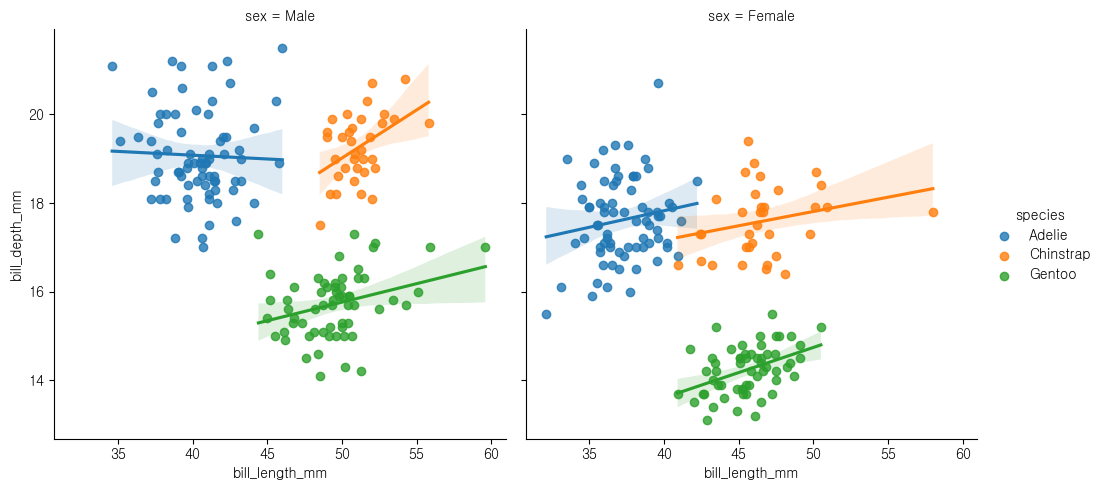

In [122]:
# figure-level 
sns.lmplot(penguins, 
            x = "bill_length_mm",
            y = "bill_depth_mm",
            hue = "species",
            col = "sex"
            )
plt.show()
# 종류를 나타낼 때는 lmplot이 더 좋다 

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


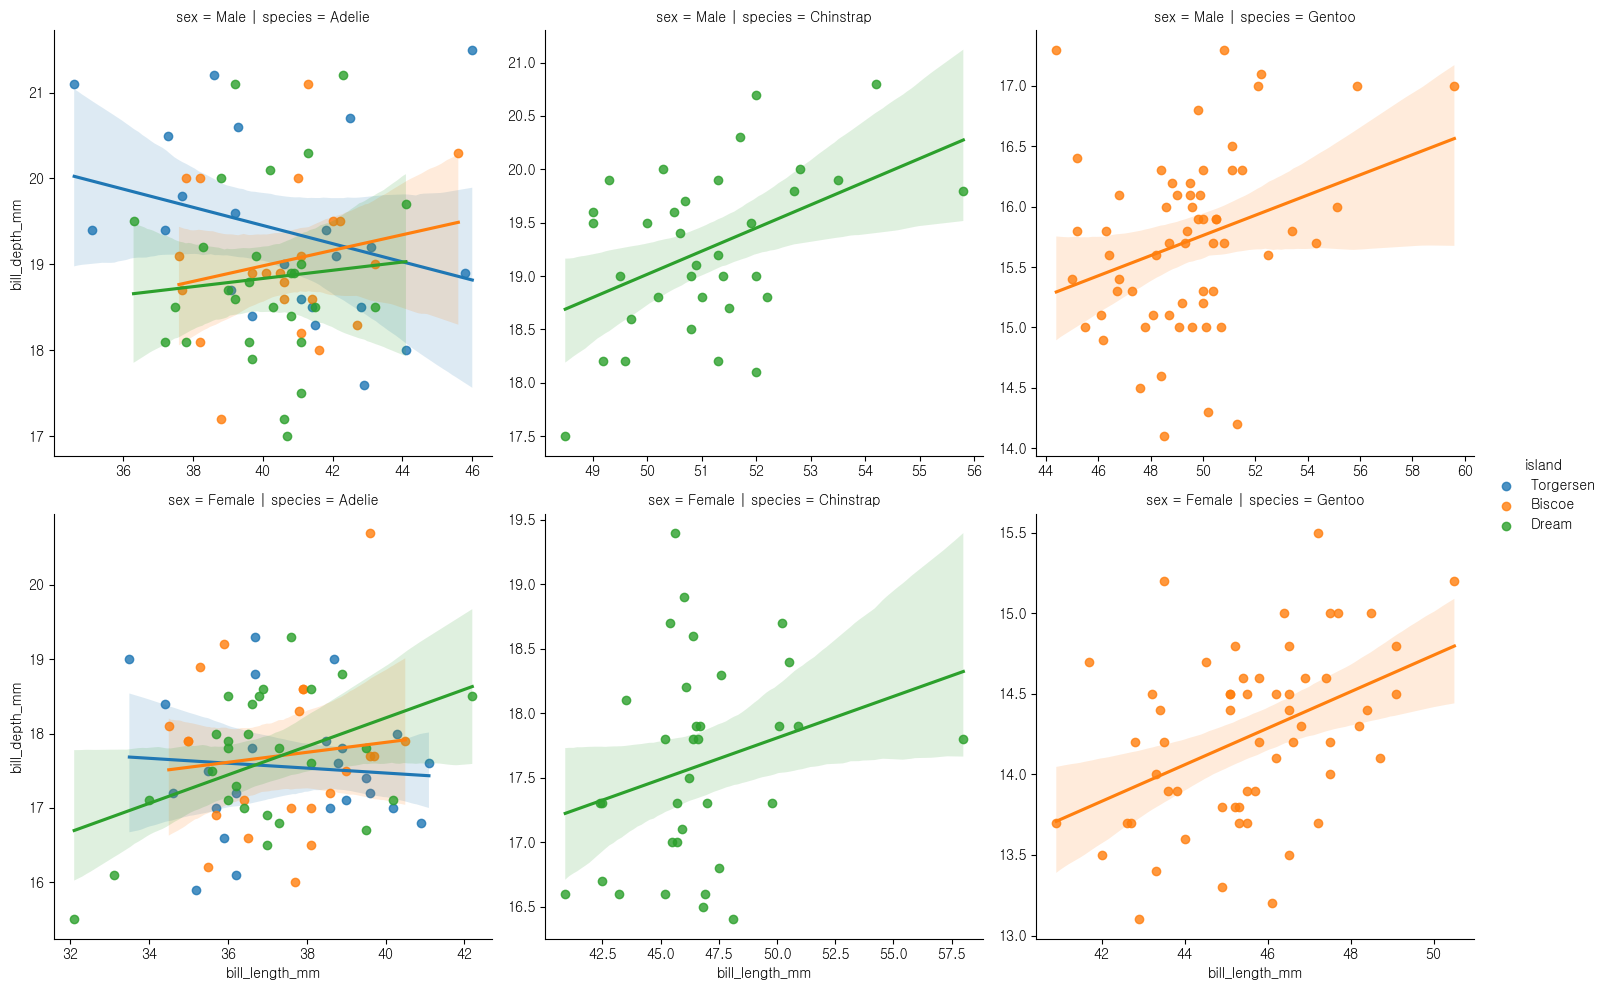

In [128]:
# 여러 개의 그래프를 여러 개 그릴 수 있다. 
sns.lmplot(penguins, 
            x = "bill_length_mm",
            y = "bill_depth_mm", 
            col = "species",
            row = 'sex',
            hue = "island",
            sharex = False, 
            sharey = False
            )
plt.show() 

In [129]:
print(diamonds)
# clarity 별 
# x축에 carat 
# y축은 price 


       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\regression.py:598: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


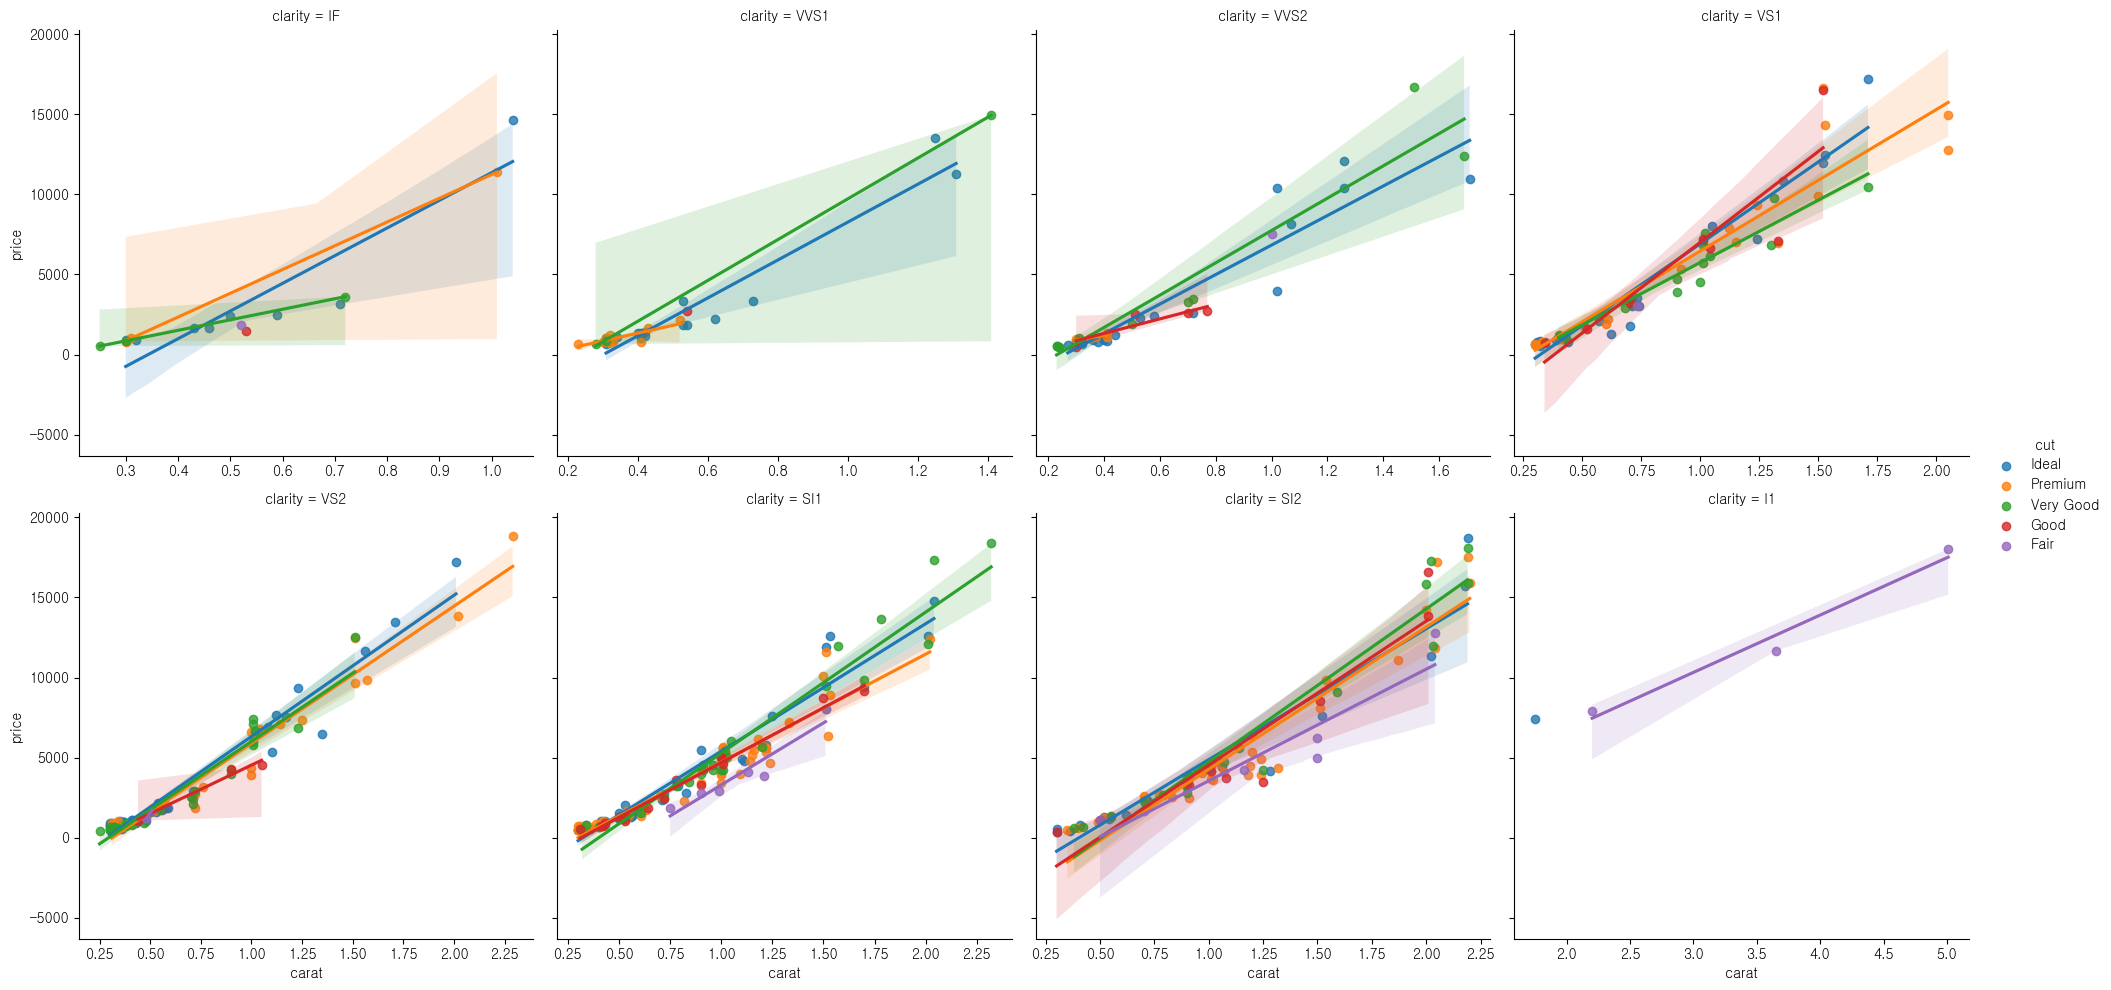

In [143]:
## 2. 실습 
# diamonds_df = diamonds[diamonds["cut"]== "Ideal"]
sns.lmplot(diamonds.sample(500), 
            x = "carat",
            y = "price", 
            col = "clarity",
            sharex = False,
            sharey = True, 
            hue = "cut",
            col_wrap = 4
            )
plt.show() 

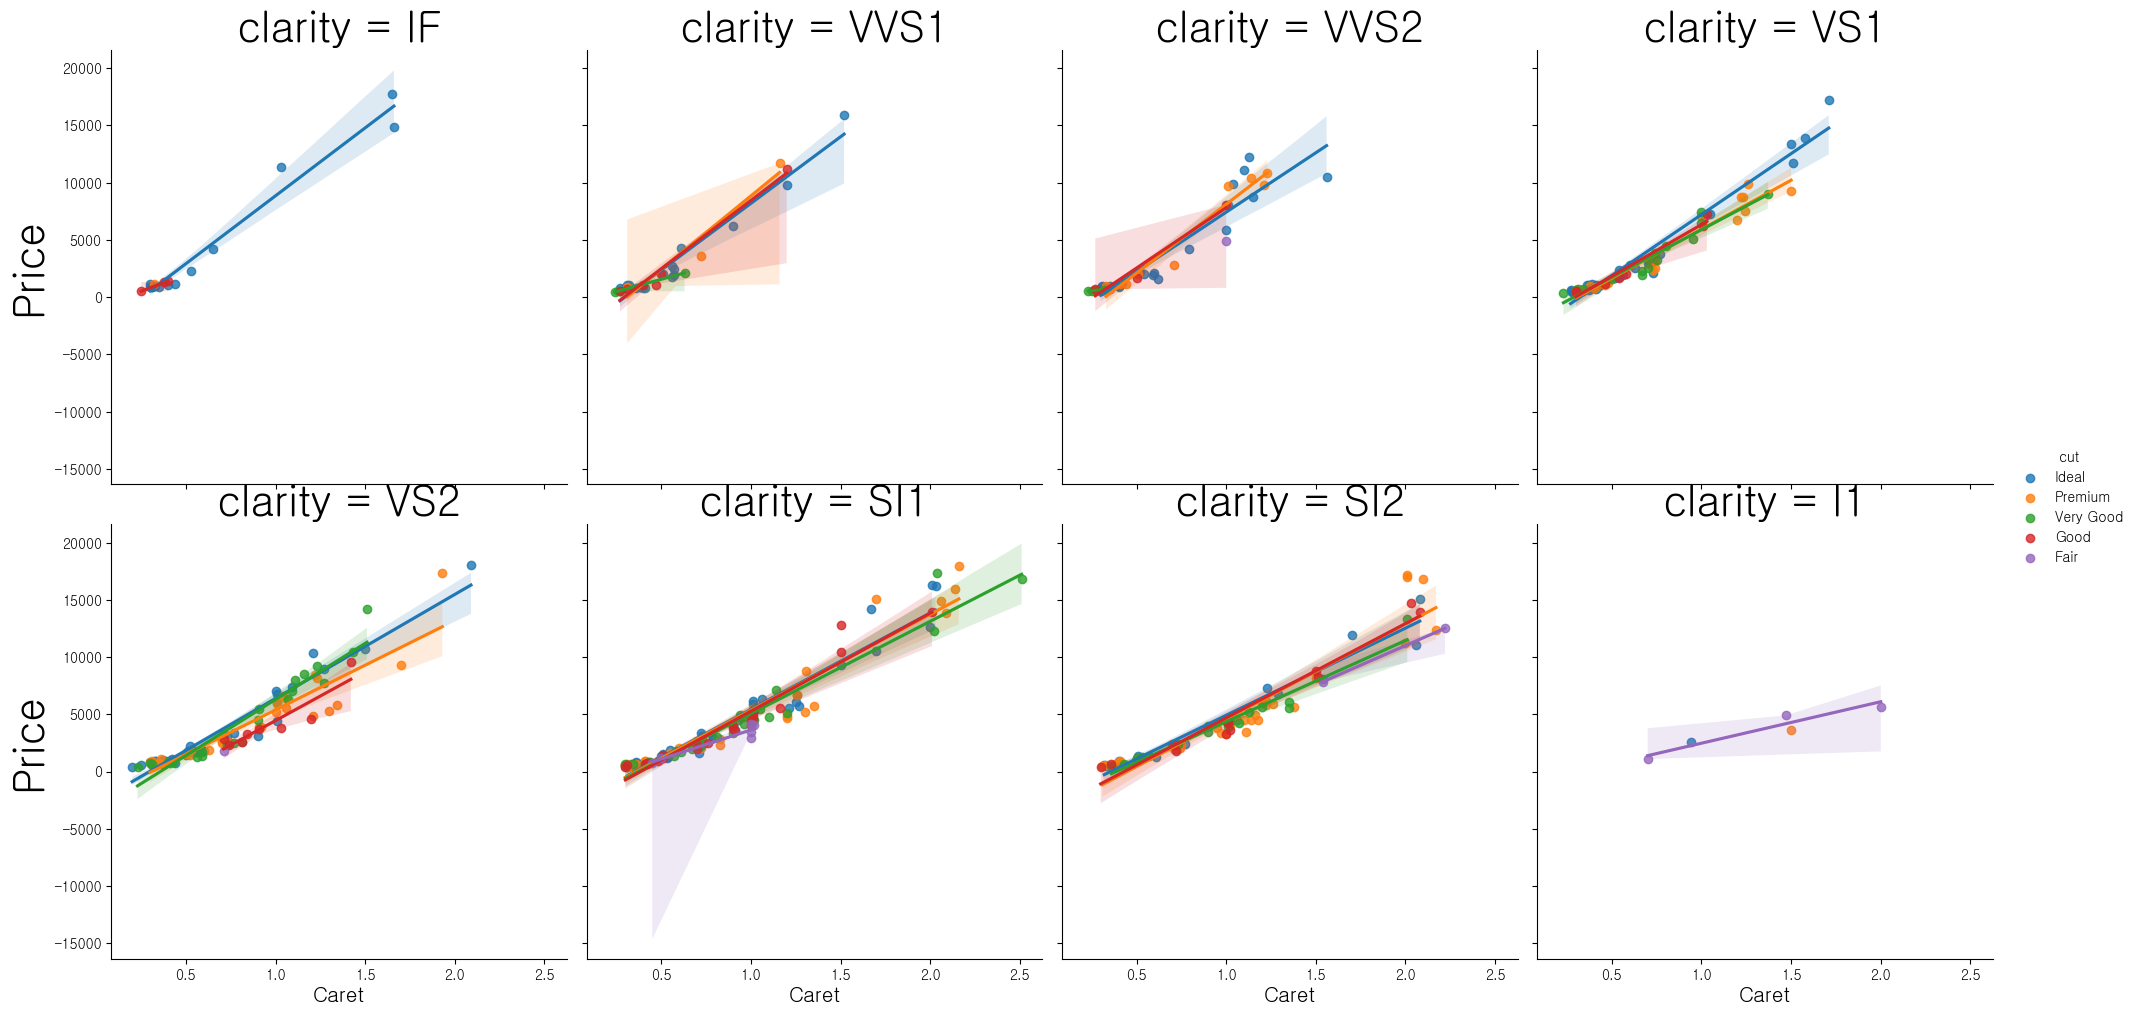

In [153]:
## 2. 답지 
# diamonds_df.shape

# 샘플링하기 
p = sns.lmplot(diamonds.sample(n = 500), 
           x = 'carat', 
           y = 'price', 
           col = 'clarity',
           hue = "cut", 
           col_wrap = 4
           )
p.set_titles(size = 30) # 글자 사이즈 바꾸기 
p.set_xlabels("Caret", size = 15)
p.set_ylabels("Price", size = 30 )
plt.show()

In [156]:
## sns.scatterplot 
tips = sns.load_dataset("tips")
print("tips = \n", tips.head(), '\n')
print('='*50)
print(tips.info())

tips = 
    total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB
None


In [157]:
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


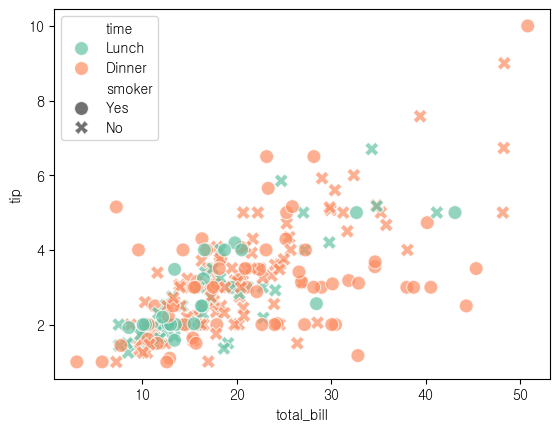

In [172]:
## 아침 저녁에 따른 팁의 가격 차이
sns.scatterplot(tips,
                x = "total_bill",
                y = "tip", 
                hue = "time",
                style= "smoker",
                s = 100, # 사이즈 
                alpha = 0.7, 
                palette = "Set2" # 색상 바꾸기 
                )
plt.show()
# 저녁에 팁을 더 많이 줬구나! 
# 우리는 연습때문에 섞어서 그렸는데, 원래는 섞어서 그리면 안됨 

In [164]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [174]:
print(diamonds)

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]


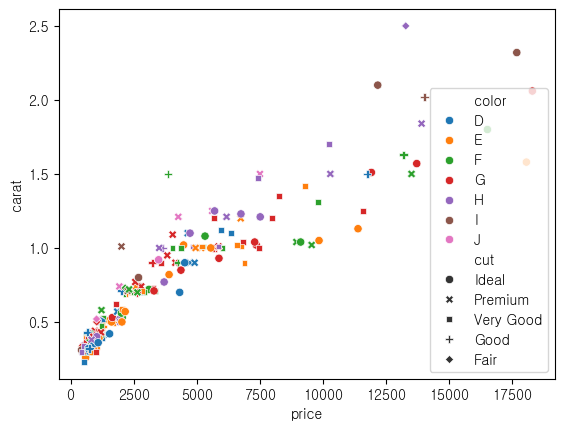

In [197]:
## 3. 실습 
sns.scatterplot(diamonds.sample(200),
                x = "price",
                y = "carat", 
                hue = "color",
                style="cut",
                # s = 100, # 사이즈 
                # alpha = 0.7, 
                # palette = "Set2" # 색상 바꾸기 
                )
plt.show()

In [198]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [215]:
color_idx = (diamonds["color"] == "D") | (diamonds["color"] == "E" )| (diamonds["color"] == "F")
cut_idx = (diamonds["cut"] == "Ideal") | (diamonds["cut"] == "Good") | (diamonds["cut"] == "Fair")  
final_idx = color_idx & cut_idx
print(final_idx)

diamonds_df = diamonds[final_idx]
diamonds_df["color"] = diamonds_df["color"].cat.remove_unused_categories() 
# color에 메타정보가 남아있다. 
# 쓰지 않는 카데고리는 remove하겠다 
diamonds_df["cut"] = diamonds_df["cut"].cat.remove_unused_categories()

0         True
1        False
2         True
3        False
4        False
         ...  
53935     True
53936     True
53937    False
53938    False
53939     True
Length: 53940, dtype: bool


C:\Users\user\AppData\Local\Temp\ipykernel_19356\1604036690.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_df["color"] = diamonds_df["color"].cat.remove_unused_categories()
C:\Users\user\AppData\Local\Temp\ipykernel_19356\1604036690.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diamonds_df["cut"] = diamonds_df["cut"].cat.remove_unused_categories()


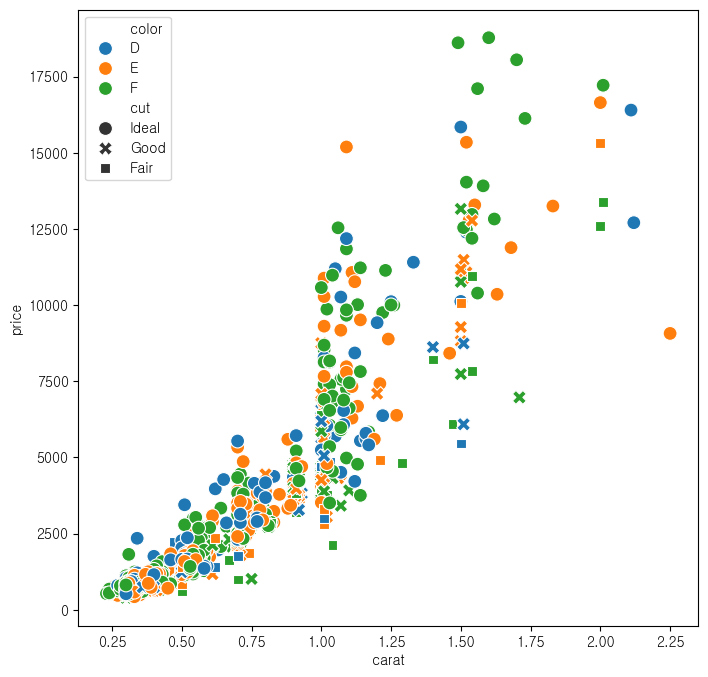

In [216]:
fig, ax = plt.subplots(figsize = (8,8 ))
sns.scatterplot(diamonds_df.sample(n = 1000),
                x = "carat",
                y = "price", 
                hue = "color",
                style="cut",
                s =  100)
plt.show()

In [217]:
## 
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
